# Predicting Bike Rental Riders

To test my neural network, I'll use it to try and predict the daily bike rental ridership

[Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-dark')
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

## Data Preparations

In [2]:
# load data
data_path = 'data/hour.csv'
rides = pd.read_csv(data_path)
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
rides.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [4]:
rides.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
# check if any of the columns contain missing values
print(f'Missing values:\n {rides.columns[rides.isna().any()]}')

Missing values:
 Index([], dtype='object')


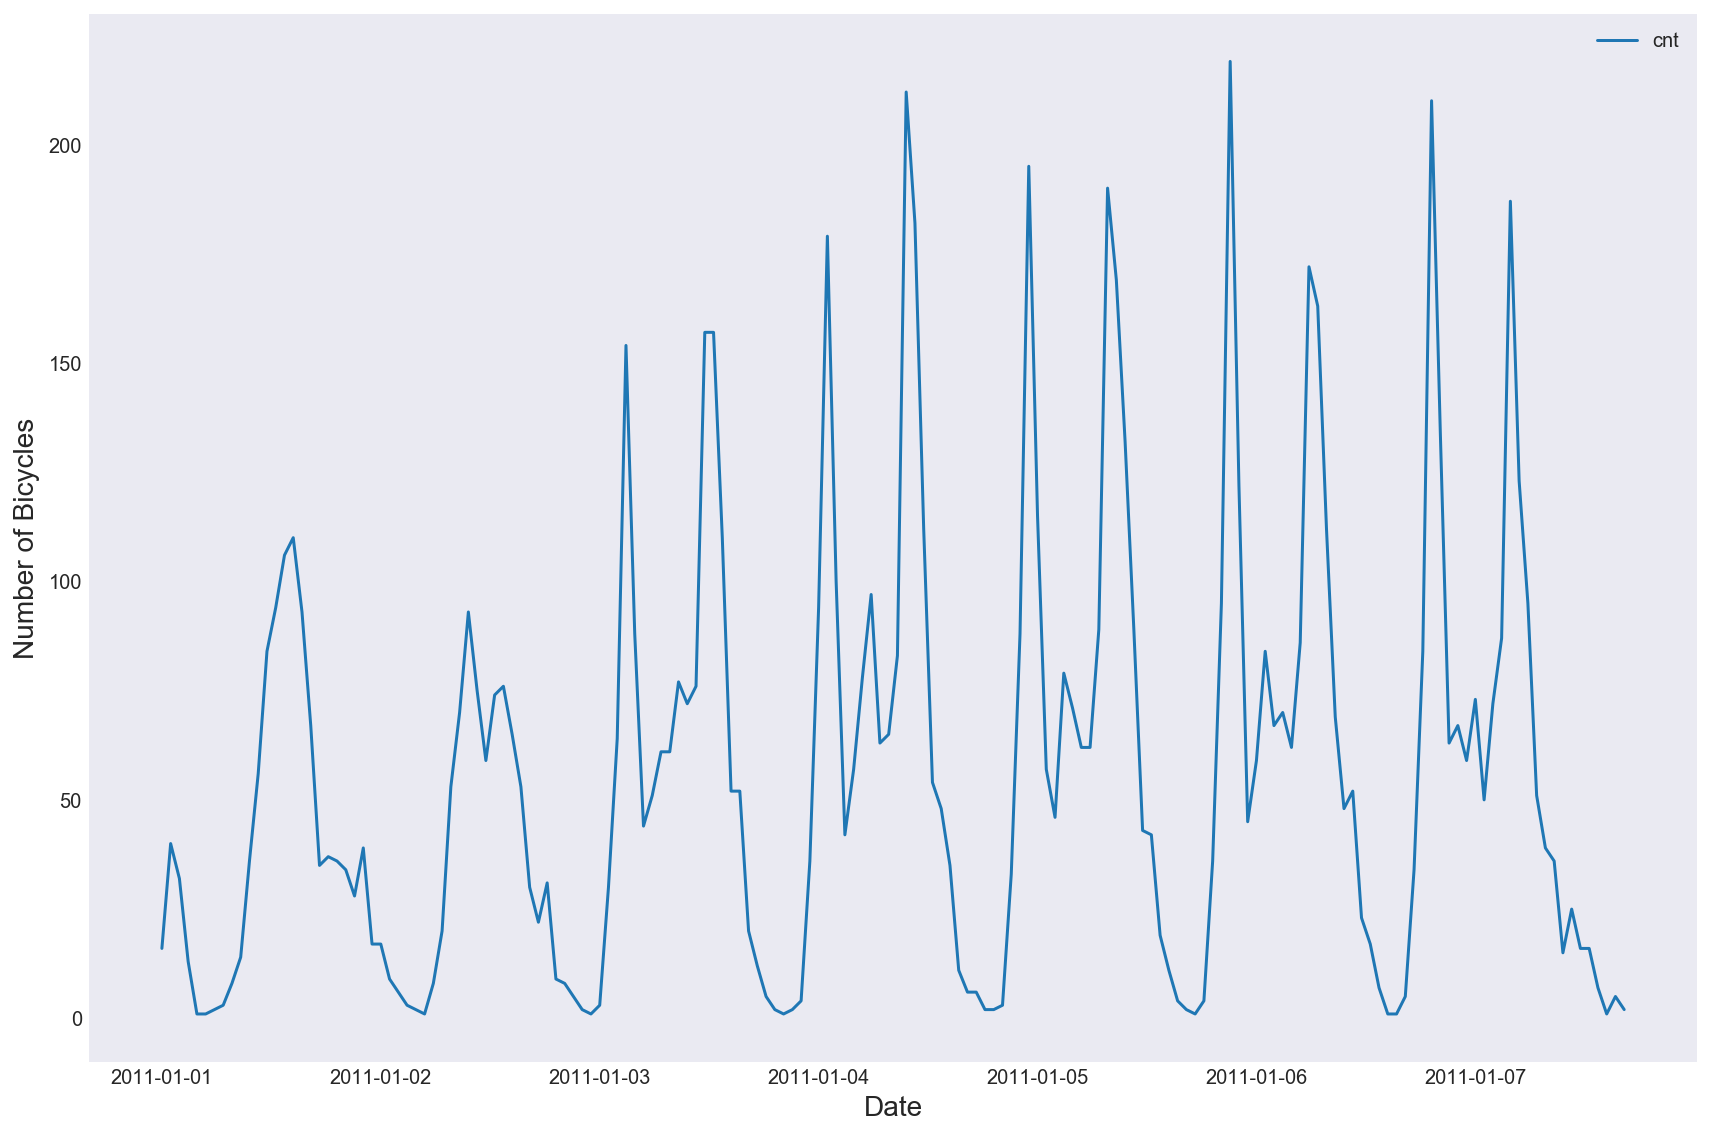

In [6]:
# the dataset has about 24 entries (24 hours in a day) per day.

# check out the number of riders in the first week
ax = rides[:24*7].plot(x='dteday', y='cnt', figsize=(12, 8))
ax.set_xlabel('Date')
ax.set_ylabel('Number of Bicycles')
plt.tight_layout()

Mean: 189.46     
Median: 142.0     
Standard Deviation: 181.39


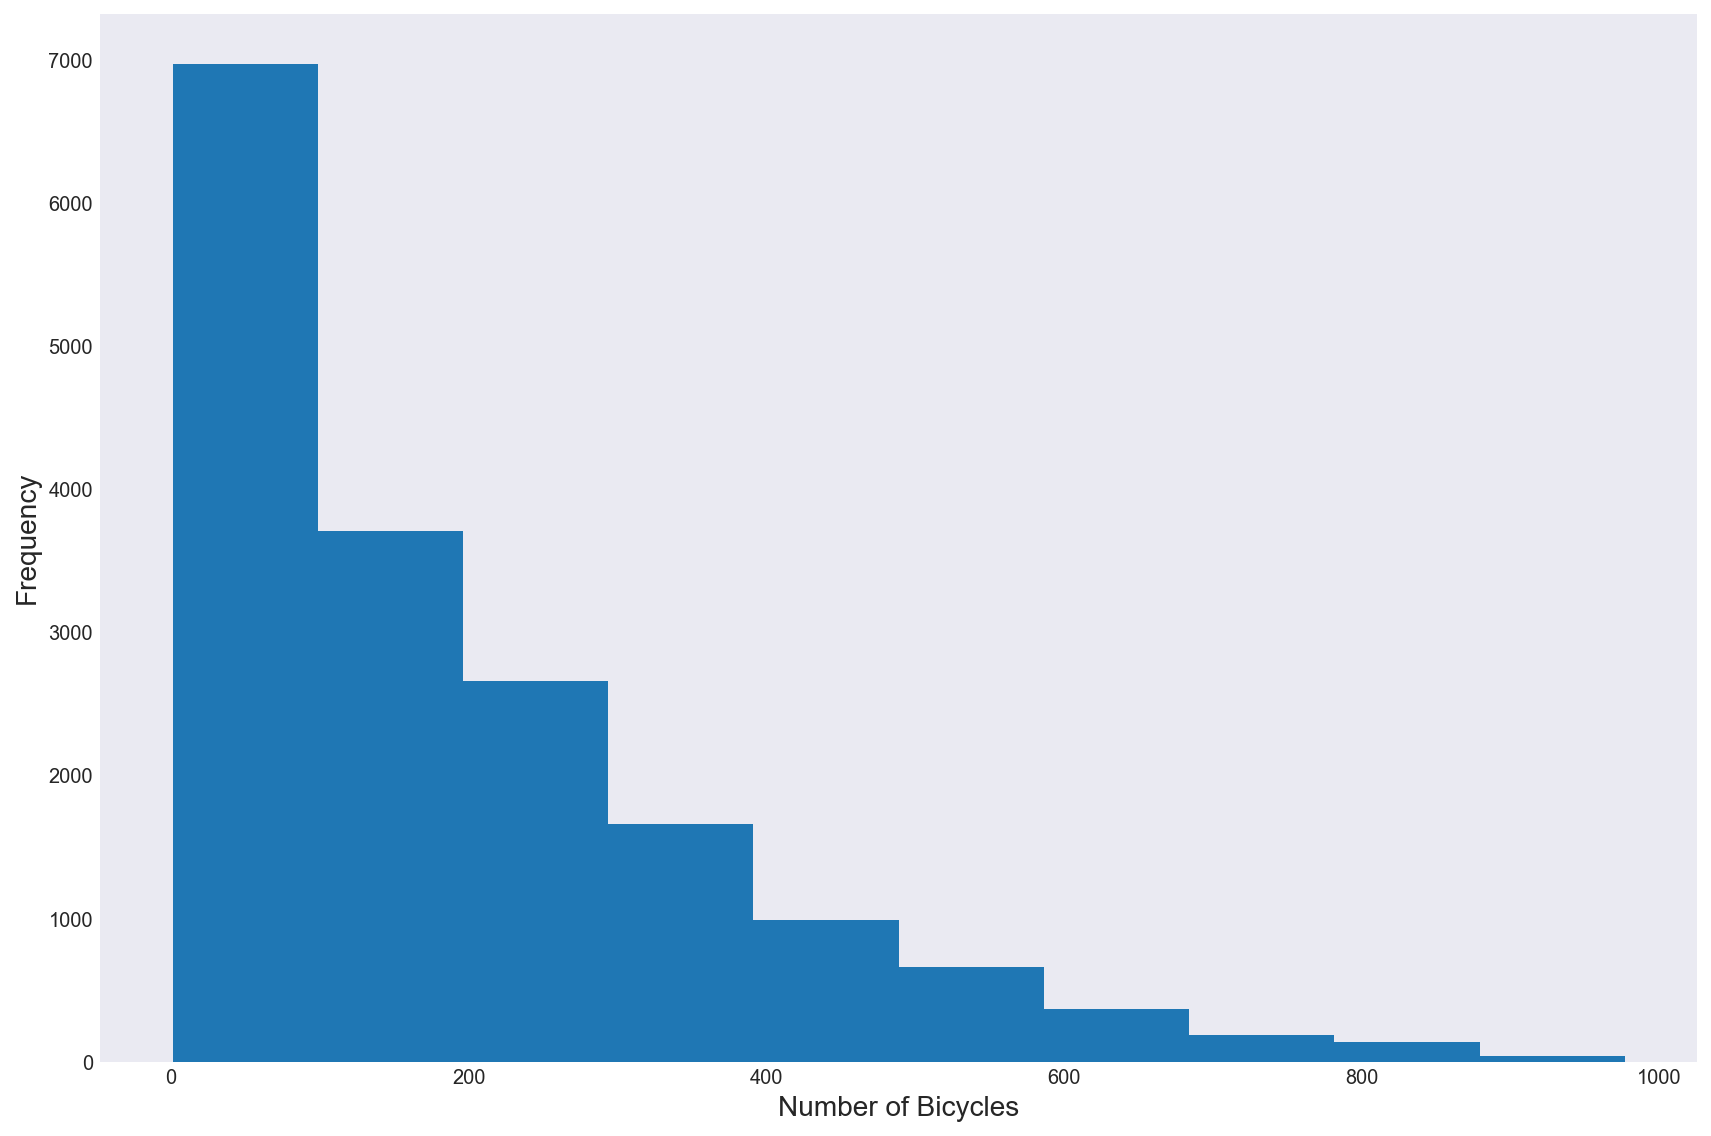

In [7]:
# check rider distributions
rental_count = rides.loc[:, 'cnt']
hist_ax = rental_count.plot.hist(figsize=(12, 8))
hist_ax.set_xlabel('Number of Bicycles')
hist_ax.set_ylabel('Frequency')
plt.tight_layout()
print(f'Mean: {round(rental_count.mean(), 2)} \
    \nMedian: {round(rental_count.median(), 2)} \
    \nStandard Deviation: {round(rental_count.std(), 2)}')

### OneHotEncode Categorical Features

In [8]:
categorical_columns = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for categorical in categorical_columns:
    dummies = pd.get_dummies(rides[categorical], prefix=categorical, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

# drop the encoded columns, index and few other features
columns_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']

data = rides.drop(columns_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


### Scale Continuous Features

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaling_dictionary = {}
continuous_columns = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']

for column in continuous_columns:
    scaler = MinMaxScaler()
    data[column] = scaler.fit_transform(data[[column]])
    
    # save the scaler objects to reverse transform
    scaling_dictionary[column] = scaler

In [10]:
# reserve approximately 21 days for testing
testing_data = data[-21*24:]
training_data = data.iloc[:-21*24, :].copy(deep=True)

# separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']

features, targets = training_data.drop(target_fields, axis=1), training_data[target_fields]
x_test, y_test = testing_data.drop(target_fields, axis=1), testing_data[target_fields]

# reserve approximately 60 days for validation
x_train, y_train = features[:-60*24], targets[:-60*24]
x_val, y_val = features[-60*24:], targets[-60*24:]

In [11]:
inputs_nodes = features.shape[1]
iterations = 6000
learning_rate = 0.31
hidden_nodes = 32
output_nodes = 1

In [12]:
import sys
from NeuralNetworks import RegressionNetwork

# initialize model
network = RegressionNetwork(inputs_nodes, hidden_nodes, output_nodes, learning_rate)

In [13]:
def MSE(target, prediction):
    return np.mean((target - prediction)**2)

In [14]:
losses = {'train':[], 'validation':[]}
for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(x_train.index, size=128)
    X, y = x_train.iloc[batch].values, y_train.iloc[batch]['cnt']
                             
    network.train(X, y)
    
    # Printing out the training progress
    train_loss = MSE(np.array(network.run(x_train)).T, y_train['cnt'].values)
    val_loss = MSE(np.array(network.run(x_val)).T, y_val['cnt'].values)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 100.0% ... Training loss: 0.010 ... Validation loss: 0.016

Test Loss: 0.010655787358899412


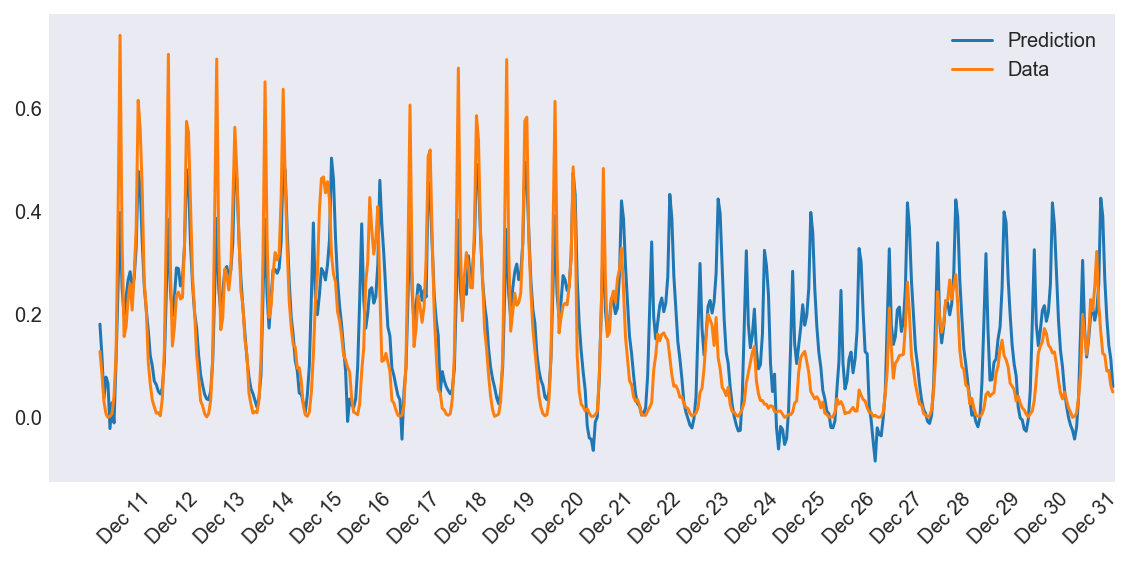

In [15]:
# check how the model does on the test set
fig, ax = plt.subplots(figsize=(12,8))

predictions = np.array(network.run(x_test))
ax.plot(predictions, label='Prediction')
ax.plot((y_test['cnt']).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.iloc[x_test.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)
plt.tight_layout()

test_loss = MSE(np.array(network.run(x_test)).T, y_test['cnt'].values)
print(f'Test Loss: {test_loss}')